In [1]:
import pandas as pd
import pickle
import numpy as np
#from tqdm import tqdm
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

# need to padding

In [149]:
#df=pd.read_csv('ED_1hour_zero.csv')
#df

In [150]:
from tqdm import tqdm

stay_ids = df['stay_id'].unique()
num_vars = df.shape[1]
padded_data = []
padding_label = 0 

for stay_id in tqdm(stay_ids):
    group_data = df[df['stay_id'] == stay_id].iloc[:, :].values
    num_rows = group_data.shape[0]
    
    # Check if padding is needed
    if num_rows < 24:
        padding_needed = 24 - num_rows
        padding_array = np.full((padding_needed, num_vars), padding_label)  
        padded_group_data = np.concatenate((group_data, padding_array))
    else:
        padded_group_data = group_data
    
    padded_data.append(padded_group_data)

padded_array = np.concatenate(padded_data)

100%|██████████| 312275/312275 [08:21<00:00, 622.15it/s] 


In [151]:
df_1 = pd.DataFrame(padded_array, columns=df.columns.tolist()[0:])
df_1

,stay_id,time,max_temp,max_hr,max_resp,max_o2sat,max_sbp,max_dbp,min_temp,min_hr,...,label_after_6hour,gender_F,gender_M,race_Black,race_Other,race_White,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_WALK IN
0,30000012,2126-02-14 21:22:00,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,...,2.0,1,0,0,0,1,1,0,0,0
1,30000012,2126-02-14 22:22:00,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,...,2.0,1,0,0,0,1,1,0,0,0
2,30000012,2126-02-14 23:22:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1,0,0,0,1,1,0,0,0
3,30000012,2126-02-15 00:22:00,0.0,80.0,13.0,99.0,112.0,44.0,0.0,80.0,...,2.0,1,0,0,0,1,1,0,0,0
4,30000012,2126-02-15 01:22:00,37.0,88.0,16.0,100.0,135.0,51.0,37.0,80.0,...,2.0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7494596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7494597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7494598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df_1['stay_id'].replace(0, np.nan, inplace=True)
df_1['stay_id'].fillna(method='ffill', inplace=True)

C:\Users\DAHS\AppData\Local\Temp\ipykernel_10520\3032311389.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_1['stay_id'].fillna(method='ffill', inplace=True)


In [153]:
df_1

,stay_id,time,max_temp,max_hr,max_resp,max_o2sat,max_sbp,max_dbp,min_temp,min_hr,...,label_after_6hour,gender_F,gender_M,race_Black,race_Other,race_White,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_WALK IN
0,30000012.0,2126-02-14 21:22:00,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,...,2.0,1,0,0,0,1,1,0,0,0
1,30000012.0,2126-02-14 22:22:00,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,...,2.0,1,0,0,0,1,1,0,0,0
2,30000012.0,2126-02-14 23:22:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1,0,0,0,1,1,0,0,0
3,30000012.0,2126-02-15 00:22:00,0.0,80.0,13.0,99.0,112.0,44.0,0.0,80.0,...,2.0,1,0,0,0,1,1,0,0,0
4,30000012.0,2126-02-15 01:22:00,37.0,88.0,16.0,100.0,135.0,51.0,37.0,80.0,...,2.0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494595,39999961.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7494596,39999961.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7494597,39999961.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7494598,39999961.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
#df_1.to_csv('ED_2hour_zero_full.csv',index=False)
df_1=pd.read_csv('ED_3hour_foward_full.csv')

In [225]:
name="label_after_1hour"

In [226]:
df_1=df_1.copy()

In [227]:
#df_1=df_1[~df_1['stay_id'].isin(df_1[df_1[name]==2]['stay_id'].unique())]

In [228]:
df_1.loc[df_1[name] == 1, name] = 0
df_1.loc[df_1[name] == 2, name] = 0
df_1.loc[df_1[name] == 3, name] = 1

In [229]:
df_1[name].value_counts()

label_after_1hour
0.0    7138745
1.0      10399
Name: count, dtype: int64

In [233]:
from sklearn.model_selection import train_test_split

positive_samples = df_1[df_1[name] == 1]

unique_stay_ids = positive_samples['stay_id'].unique()

train_stay_ids, temp_stay_ids = train_test_split(unique_stay_ids, test_size=0.2, random_state=314)
test_stay_ids, val_stay_ids = train_test_split(temp_stay_ids, test_size=0.333, random_state=314)

train_positive_samples = df_1[df_1['stay_id'].isin(train_stay_ids)]
test_positive_samples = df_1[df_1['stay_id'].isin(test_stay_ids)]
val_positive_samples = df_1[df_1['stay_id'].isin(val_stay_ids)]

n_df=df_1[~df_1['stay_id'].isin(unique_stay_ids)]

train_stay_, temp_stay_ = train_test_split(n_df['stay_id'].unique(), test_size=0.2, random_state=314)
test_stay_, val_stay_ = train_test_split(temp_stay_, test_size=0.333, random_state=314)

train_negative_samples = df_1[df_1['stay_id'].isin(train_stay_)]
test_negative_samples = df_1[df_1['stay_id'].isin(test_stay_)]
val_negative_samples = df_1[df_1['stay_id'].isin(val_stay_)]

train_df = pd.concat([train_positive_samples, train_negative_samples])
test_df = pd.concat([test_positive_samples, test_negative_samples])
val_df = pd.concat([val_positive_samples, val_negative_samples])

In [234]:
train_df=train_df.sort_index()
test_df=test_df.sort_index()
val_df=val_df.sort_index()

In [235]:
print(len(train_df['stay_id'].unique()))
print(len(test_df['stay_id'].unique()))
print(len(val_df['stay_id'].unique()))

238304
39737
19840


In [236]:
train_x=train_df.drop(['stay_id','time','label_after_1hour','label_after_2hour','label_after_3hour','label_after_4hour','label_after_5hour','label_after_6hour'],axis='columns')
train_y=train_df[name]
test_x=test_df.drop(['stay_id','time','label_after_1hour','label_after_2hour','label_after_3hour','label_after_4hour','label_after_5hour','label_after_6hour'],axis='columns')
test_y=test_df[name]
val_x=val_df.drop(['stay_id','time','label_after_1hour','label_after_2hour','label_after_3hour','label_after_4hour','label_after_5hour','label_after_6hour'],axis='columns')
val_y=val_df[name]

In [237]:
train_x

,max_temp,max_hr,max_resp,max_o2sat,max_sbp,max_dbp,min_temp,min_hr,min_resp,min_o2sat,...,inpute_tri_dbp,gender_F,gender_M,race_Black,race_Other,race_White,arrival_transport_AMBULANCE,arrival_transport_HELICOPTER,arrival_transport_OTHER,arrival_transport_WALK IN
0,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,18.0,93.0,...,0,1,0,0,0,1,1,0,0,0
1,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,18.0,93.0,...,0,1,0,0,0,1,1,0,0,0
2,37.111111,96.0,18.0,93.0,160.0,54.0,37.111111,96.0,18.0,93.0,...,0,1,0,0,0,1,1,0,0,0
3,37.111111,80.0,13.0,99.0,112.0,44.0,37.111111,80.0,13.0,99.0,...,0,1,0,0,0,1,1,0,0,0
4,37.000000,88.0,16.0,100.0,135.0,51.0,37.000000,80.0,13.0,99.0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7149139,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7149140,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7149141,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7149142,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
train_x = train_x.astype(np.float32)
train_y = train_y.astype(np.float32)
test_x = test_x.astype(np.float32)
test_y = test_y.astype(np.float32)
val_x = val_x.astype(np.float32)
val_y = val_y.astype(np.float32)
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x = test_x.to_numpy()
test_y = test_y.to_numpy()
val_x = val_x.to_numpy()
val_y = val_y.to_numpy()
train_data_x_reshaped = train_x.reshape((len(train_df['stay_id'].unique()), 24, 114))
train_data_y_reshaped = train_y.reshape((len(train_df['stay_id'].unique()), 24,1))
test_data_x_reshaped = test_x.reshape((len(test_df['stay_id'].unique()), 24, 114))
test_data_y_reshaped = test_y.reshape((len(test_df['stay_id'].unique()), 24, 1))
val_x_reshaped = val_x.reshape((len(val_df['stay_id'].unique()), 24, 114))
val_y_reshaped = val_y.reshape((len(val_df['stay_id'].unique()), 24, 1))

In [239]:
val_y_reshaped
np.count_nonzero(val_y_reshaped == 1)

693

In [240]:
largest_values = np.max(train_data_y_reshaped, axis=1, keepdims=True) 
train_data_y_reshaped_1 = largest_values.reshape(len(train_df['stay_id'].unique()), 1, 1)

largest_values = np.max(test_data_y_reshaped, axis=1, keepdims=True) 
test_data_y_reshaped_1 = largest_values.reshape(len(test_df['stay_id'].unique()), 1, 1)

largest_values = np.max(val_y_reshaped, axis=1, keepdims=True) 
val_y_reshaped_1 = largest_values.reshape(len(val_df['stay_id'].unique()), 1, 1)

In [241]:
train_data_y_reshaped_1[:,:,0]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [242]:
#np.save('all_train_data_x.npy', train_data_x_reshaped)
#np.save('all_train_data_y.npy', train_data_y_reshaped)
#np.save('all_test_data_x.npy', test_data_x_reshaped)
#np.save('all_test_data_y.npy', test_data_y_reshaped)
#np.save('all_val_data_x.npy', val_x_reshaped)
#np.save('all_val_data_y.npy', val_y_reshaped)

In [243]:
train_dataset = TensorDataset(torch.tensor(train_data_x_reshaped),torch.tensor(train_data_y_reshaped_1)) 
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False) 

valid_dataset = TensorDataset(torch.tensor(val_x_reshaped),torch.tensor(val_y_reshaped_1))
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(torch.tensor(test_data_x_reshaped),torch.tensor(test_data_y_reshaped_1)) 
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False) 

In [244]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [250]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class baseline_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=114, hidden_size=180, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=180, hidden_size=64, batch_first=True)
        self.lstm3 = nn.LSTM(input_size=64, hidden_size=32, batch_first=True)
        self.linear1 = nn.Linear(32*24, 256) 
        self.linear2 = nn.Linear(256, 128) 
        self.linear3 = nn.Linear(128, 64)
        self.linear4 = nn.Linear(64, 1)
        

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out, _ = self.lstm3(out)
        out = out.reshape(out.size(0), -1)
        out = F.leaky_relu_(self.linear1(out))
        out = F.leaky_relu_(self.linear2(out))
        out = F.leaky_relu_(self.linear3(out))
        out = torch.sigmoid(self.linear4(out))

        return out

model = baseline_model()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


baseline_model(
  (lstm1): LSTM(114, 180, batch_first=True)
  (lstm2): LSTM(180, 64, batch_first=True)
  (lstm3): LSTM(64, 32, batch_first=True)
  (linear1): Linear(in_features=768, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=1, bias=True)
)

In [251]:
EPOCHS = 100

min_valid_loss = np.inf
early_stopping_patience = 10
early_stopping_counter = 0
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

for e in range(EPOCHS):
    train_loss = 0.0
    correct = 0
    total = 0
    model.train()
    for x, y in train_dataloader:
        x, y = x.float().to(device), y.float().to(device)
        #mask = torch.sum(x, axis = 2)
        #mask[mask>0] = 1
        optimizer.zero_grad()
        out = model(x)
        true_y = y[:, :, 0]
        loss = F.binary_cross_entropy(out, true_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        out[out >= 0.5] = 1
        out[out < 0.5] = 0
        total += true_y.numel()
        correct += (out == true_y).sum().item()
    train_acc = correct / total

    correct = 0
    total = 0
    valid_loss = 0.0
    model.eval()
    for x,y in valid_dataloader:
        x, y = x.float().to(device), y.float().to(device)
        #mask = torch.sum(x, axis = 2)
        #mask[mask>0] = 1
        out = model(x)
        true_y = y[:, :, 0]
        loss = F.binary_cross_entropy(out , true_y)
        valid_loss += loss.item()
        out[out >= 0.5] = 1
        out[out < 0.5] = 0
        total += true_y.numel()
        correct += (out == true_y).sum().item()
            
    valid_acc = correct / total

    print(f'Epoch {e+1} \t Training Loss: {train_loss / len(train_dataloader)} \t Training Acc: {train_acc} \t\t Validation Loss: {valid_loss / len(valid_dataloader)} \t Validation Acc: {valid_acc}')
    
    if min_valid_loss > valid_loss:
        print(f'Validation Loss Decreased ({min_valid_loss/len(valid_dataloader):.6f}--->{valid_loss/len(valid_dataloader):.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
        early_stopping_counter = 0  # Reset the counter
        torch.save(model.state_dict(), 'Best_model_4.pth')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print(f'Validation Loss has not improved for {early_stopping_patience} consecutive epochs. Early stopping.')
            break


Epoch 1 	 Training Loss: 0.12452677571322537 	 Training Acc: 0.9646376057472807 		 Validation Loss: 0.16780117915482298 	 Validation Acc: 0.965070564516129
Validation Loss Decreased (inf--->0.167801) 	 Saving The Model
Epoch 2 	 Training Loss: 0.1092298175401801 	 Training Acc: 0.965074023096549 		 Validation Loss: 0.10097954157784941 	 Validation Acc: 0.965070564516129
Validation Loss Decreased (0.167801--->0.100980) 	 Saving The Model
Epoch 3 	 Training Loss: 0.1064966597114215 	 Training Acc: 0.9650362562105546 		 Validation Loss: 0.09887671655329365 	 Validation Acc: 0.965070564516129
Validation Loss Decreased (0.100980--->0.098877) 	 Saving The Model
Epoch 4 	 Training Loss: 0.10563682256497774 	 Training Acc: 0.965074023096549 		 Validation Loss: 0.09933710045842153 	 Validation Acc: 0.965070564516129
Epoch 5 	 Training Loss: 0.10361802872035608 	 Training Acc: 0.9650698267758829 		 Validation Loss: 0.10253554342104303 	 Validation Acc: 0.965070564516129
Epoch 6 	 Training Loss: 

In [252]:
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, average_precision_score, f1_score

model.load_state_dict(torch.load('Best_model_4.pth'))
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

conf_matrix = torch.zeros(2, 2, device=device)
predicted_labels = []
true_labels = []

total = 0
correct = 0

with torch.no_grad():
    for x, y in test_dataloader:
        x, y = x.float().to(device), y.float().to(device)
        mask = torch.sum(x, axis=2)
        mask[mask > 0] = 1
        out = model(x)
        true_y = y[:, :, 0]
        out[out >= 0.4] = 1
        out[out < 0.4] = 0

        total += torch.sum(torch.ones_like(mask) * mask)
        correct += torch.sum((out == true_y) * mask)

        conf_matrix += torch.tensor(confusion_matrix(true_y.cpu().numpy().flatten(), out.cpu().numpy().flatten(), labels=[0, 1]), device=device) 

        predicted_labels.extend(out.cpu().numpy().flatten())
        true_labels.extend(true_y.cpu().numpy().flatten())

accuracy = correct / total
print("Test Accuracy: {:.4f}".format(accuracy))

recall = recall_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, predicted_labels)
auprc=average_precision_score(true_labels, predicted_labels)
f1score=f1_score(true_labels, predicted_labels)
print("Recall: {:.4f}".format(recall))
print("Precision: {:.4f}".format(precision))
print("AUROC: {:.4f}".format(roc_auc))
print("AUPRC: {:.4f}".format(auprc))
print("f1-score: {:.4f}".format(f1score))
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 0.9652
Recall: 0.2675
Precision: 0.4684
AUROC: 0.6283
AUPRC: 0.1509
f1-score: 0.3405
Confusion Matrix:
tensor([[37929.,   421.],
        [ 1016.,   371.]], device='cuda:0')


# 리스크 스코어 도출

In [47]:
data=df.drop(['stay_id','time','label_after_1hour','label_after_2hour','label_after_3hour','label_after_4hour','label_after_5hour','label_after_6hour'],axis='columns')

In [48]:
data = data.astype(np.float32)
data = data.to_numpy()
data = data.reshape((len(df['stay_id'].unique()), 20, 156))

In [49]:
data=torch.tensor(data, dtype=torch.float32).to(device)

In [50]:
with torch.no_grad():
    out = model(data)

In [51]:
df_1=df.groupby('stay_id').first().reset_index()
df_1=df_1[['stay_id']]

In [52]:
df_1['risk_score']=out.view(-1, 1).cpu().numpy()

In [53]:
dfdfdf=pd.read_csv('pre_ED_v0.4.csv')


In [54]:
dfdfdf=dfdfdf[['stay_id','result']]

In [55]:
dfdfdf= dfdfdf.drop_duplicates()

In [56]:
risk=pd.merge(df_1,dfdfdf,on='stay_id',how='left')

In [57]:
risk.to_csv('risk_231009_1.csv')

C:\Users\DAHS\AppData\Local\anaconda3\envs\torch\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DAHS\AppData\Local\Temp\ipykernel_18804\2974337058.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', num_clusters)


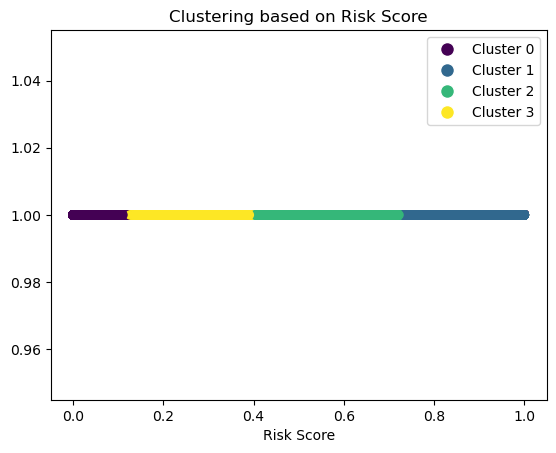

In [206]:
from matplotlib.lines import Line2D
risk_scores = risk['risk_score'].values.reshape(-1, 1)

num_clusters = 4

# Create and fit the K-Means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(risk_scores)

# Add the cluster labels to your original data frame
risk['Cluster_4'] = cluster_labels

# Create a colormap for the clusters
colormap = plt.cm.get_cmap('viridis', num_clusters)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', 
                          markerfacecolor=colormap(i), markersize=10) for i in range(num_clusters)]

# Visualize the clusters with color labels
plt.scatter(risk['risk_score'], [1] * len(risk_scores), c=cluster_labels, cmap=colormap)
plt.xlabel('Risk Score')
plt.title('Clustering based on Risk Score')
plt.legend(handles=legend_elements, loc='upper right')  # Add the custom legend
plt.show()

In [199]:
risk

,stay_id,risk_score,result,Cluster
0,30000012.0,0.461623,hos,2
1,30000038.0,0.168594,hos,0
2,30000039.0,0.099961,hos,0
3,30000094.0,0.038318,ed,0
4,30000177.0,0.000933,hos,0
...,...,...,...,...
282898,39999835.0,0.716397,hos,1
282899,39999863.0,0.030222,hos,0
282900,39999933.0,0.003310,ed,0
282901,39999953.0,0.000613,ed,0


In [207]:
result_counts = pd.DataFrame()

for i in range(4):
    counts = risk[risk['Cluster_4'] == i]['result'].value_counts().reset_index()

    counts.columns = ['Result', f'Cluster_{i}_Count']

    if result_counts.empty:
        result_counts = counts
    else:
        result_counts = pd.merge(result_counts, counts, on='Result', how='outer')

result_counts = result_counts.fillna(0)

result_counts

,Result,Cluster_0_Count,Cluster_1_Count,Cluster_2_Count,Cluster_3_Count
0,ed,142477,467,1034,4067
1,hos,81104,8066,9560,19312
2,icu,2585,9110,2533,2588


In [252]:
risf_df_1['seq'] = risf_df_1.groupby('stay_id').cumcount() + 1

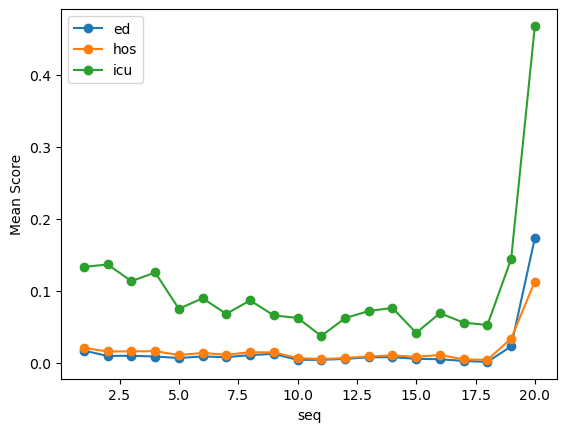

In [255]:
import matplotlib.pyplot as plt

mean_scores_df = risf_df_1.groupby(['result', 'seq'])['risk_score'].mean().reset_index()

for name, group in mean_scores_df.groupby('result'):
    plt.plot(group['seq'], group['risk_score'], marker='o', label=name)

plt.xlabel('seq')
plt.ylabel('Mean Score')
plt.legend()

plt.show()

In [256]:
stay_id_counts = risf_df_1['stay_id'].value_counts()

stay_ids_to_remove = stay_id_counts[stay_id_counts < 3].index

risf_df_1 = risf_df_1[~risf_df_1['stay_id'].isin(stay_ids_to_remove)]

In [210]:
pivot_data_1 = risf_df.pivot(index='stay_id', columns='seq', values='risk_score').fillna(np.nan)
pivot_data_1

seq,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
stay_id,,,,,,,,,,,,,,,,,,,,
30000012.0,2.612434e-07,2.777554e-04,3.372994e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000039.0,1.662692e-06,7.560774e-08,2.643095e-06,2.287070e-04,0.011209,0.220935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000094.0,1.373841e-05,2.342376e-07,3.728680e-06,1.156839e-04,0.005338,0.107315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000202.0,7.786828e-06,3.899456e-09,2.380937e-08,1.400539e-07,0.000015,0.001552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000262.0,2.825787e-07,8.626961e-07,1.201551e-05,1.665220e-06,0.000001,0.000004,0.000006,0.000005,0.000458,0.007873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39999813.0,9.067319e-13,2.299572e-05,8.928271e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39999828.0,1.600381e-07,3.082091e-07,2.381064e-06,7.732746e-07,0.000002,0.000002,0.000002,0.000002,0.000004,0.000002,2.372881e-08,1.956112e-09,2.826581e-08,5.333751e-07,0.000071,0.000252,0.003105,0.006376,NaN,NaN
39999835.0,1.846678e-07,4.605566e-11,2.107844e-09,1.712304e-07,0.000084,0.011554,0.513170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
pivot_data_2 = risf_df_1.pivot(index='stay_id', columns='seq', values='risk_score').fillna(np.nan)
pivot_data_2

seq,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
stay_id,,,,,,,,,,,,,,,,,,,,
30000012.0,8.436614e-07,5.635953e-05,9.369686e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000039.0,2.042638e-07,8.764010e-09,4.033875e-08,4.922171e-07,1.602285e-04,6.598055e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000094.0,4.801286e-07,3.052220e-08,7.618549e-08,5.076384e-07,7.233121e-05,4.224742e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000202.0,2.063038e-08,5.994193e-10,1.885194e-09,3.733009e-08,2.138283e-05,2.042833e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000262.0,1.236036e-07,3.739605e-07,6.544079e-07,1.029880e-07,3.447499e-09,3.020057e-08,7.564034e-08,1.415823e-05,0.000499,5.249817e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39999813.0,3.400771e-09,1.527497e-04,7.577931e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39999828.0,4.669311e-08,3.678039e-11,5.577324e-09,4.697689e-09,1.664623e-13,3.385876e-10,1.894966e-10,1.172927e-07,0.000002,5.489181e-09,0.000021,0.000009,0.000004,6.001205e-07,0.000002,0.000007,0.000371,0.002299,NaN,NaN
39999835.0,8.129981e-07,3.787322e-07,1.711862e-07,1.897252e-07,5.042541e-07,1.270484e-03,8.116710e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
numpy_array_2 = pivot_data_2.to_numpy()

In [211]:
numpy_array_1 = pivot_data_1.to_numpy()

In [259]:
pivot_data_1

seq,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,cluster_5
stay_id,,,,,,,,,,,,,,,,,,,,,
30000012.0,2.612434e-07,2.777554e-04,3.372994e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
30000039.0,1.662692e-06,7.560774e-08,2.643095e-06,2.287070e-04,0.011209,0.220935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
30000094.0,1.373841e-05,2.342376e-07,3.728680e-06,1.156839e-04,0.005338,0.107315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
30000202.0,7.786828e-06,3.899456e-09,2.380937e-08,1.400539e-07,0.000015,0.001552,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
30000262.0,2.825787e-07,8.626961e-07,1.201551e-05,1.665220e-06,0.000001,0.000004,0.000006,0.000005,0.000458,0.007873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39999813.0,9.067319e-13,2.299572e-05,8.928271e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
39999828.0,1.600381e-07,3.082091e-07,2.381064e-06,7.732746e-07,0.000002,0.000002,0.000002,0.000002,0.000004,0.000002,...,1.956112e-09,2.826581e-08,5.333751e-07,0.000071,0.000252,0.003105,0.006376,NaN,NaN,0
39999835.0,1.846678e-07,4.605566e-11,2.107844e-09,1.712304e-07,0.000084,0.011554,0.513170,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [282]:
pivot_data_2.drop(columns=['cluster_5'], inplace=True)
pivot_data_2

seq,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
stay_id,,,,,,,,,,,,,,,,,,,,
30000012.0,8.436614e-07,5.635953e-05,9.369686e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000039.0,2.042638e-07,8.764010e-09,4.033875e-08,4.922171e-07,1.602285e-04,6.598055e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000094.0,4.801286e-07,3.052220e-08,7.618549e-08,5.076384e-07,7.233121e-05,4.224742e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000202.0,2.063038e-08,5.994193e-10,1.885194e-09,3.733009e-08,2.138283e-05,2.042833e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000262.0,1.236036e-07,3.739605e-07,6.544079e-07,1.029880e-07,3.447499e-09,3.020057e-08,7.564034e-08,1.415823e-05,0.000499,5.249817e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39999813.0,3.400771e-09,1.527497e-04,7.577931e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39999828.0,4.669311e-08,3.678039e-11,5.577324e-09,4.697689e-09,1.664623e-13,3.385876e-10,1.894966e-10,1.172927e-07,0.000002,5.489181e-09,0.000021,0.000009,0.000004,6.001205e-07,0.000002,0.000007,0.000371,0.002299,NaN,NaN
39999835.0,8.129981e-07,3.787322e-07,1.711862e-07,1.897252e-07,5.042541e-07,1.270484e-03,8.116710e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
import pandas as pd
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
#normalized_data = TimeSeriesScalerMeanVariance().fit_transform(pivot_data_1.values)

n_clusters = 4
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter=5, metric="dtw", verbose=True, random_state=2023,n_jobs=-1 )
cluster_labels = kmeans.fit_predict(pivot_data_2)

pivot_data_2['cluster_4'] = cluster_labels

data_with_clusters = pd.merge(risf_df_1, pivot_data_2['cluster_4'], left_on='stay_id', right_index=True)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.007 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.003 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.003 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.002 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.002 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

In [272]:
data_with_clusters.to_csv('result_hos.csv')

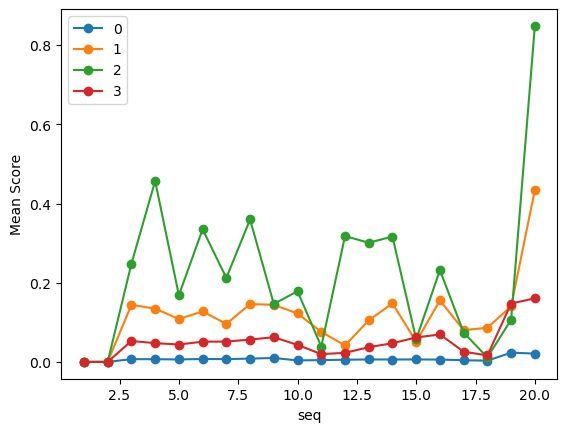

In [284]:
import matplotlib.pyplot as plt

mean_scores_df = data_with_clusters.groupby(['cluster_4', 'seq'])['risk_score'].mean().reset_index()

for name, group in mean_scores_df.groupby('cluster_4'):
    plt.plot(group['seq'], group['risk_score'], marker='o', label=name)

plt.xlabel('seq')
plt.ylabel('Mean Score')
plt.legend()

plt.show()


In [285]:
df_st = data_with_clusters.groupby('stay_id').first()
result_counts = pd.DataFrame()

for i in range(5):
    counts = df_st[df_st['cluster_4'] == i]['result'].value_counts().reset_index()

    counts.columns = ['Result', f'Cluster_{i}_Count']

    if result_counts.empty:
        result_counts = counts
    else:
        result_counts = pd.merge(result_counts, counts, on='Result', how='outer')

result_counts = result_counts.fillna(0)

result_counts

,Result,Cluster_0_Count,Cluster_1_Count,Cluster_2_Count,Cluster_3_Count,Cluster_4_Count
0,ed,79191,771,59,1501,0.0
1,hos,78358,3992,526,5756,0.0
2,icu,2980,2981,1772,1452,0.0


In [275]:
#pivot_data_1.drop(columns=['cluster_5'], inplace=True)

In [276]:
#pivot_data_2.drop(columns=['cluster_5'], inplace=True)

In [270]:
risf_df_1

,stay_id,risk_score,result,seq
0,30000012.0,8.436614e-07,hos,1
1,30000012.0,5.635953e-05,hos,2
2,30000012.0,9.369686e-02,hos,3
4,30000039.0,2.042638e-07,hos,1
5,30000039.0,8.764010e-09,hos,2
...,...,...,...,...
1156496,39999961.0,2.217615e-08,hos,2
1156497,39999961.0,3.469805e-08,hos,3
1156498,39999961.0,2.022050e-07,hos,4
1156499,39999961.0,2.749717e-05,hos,5


In [269]:
#resulting_array = np.stack((numpy_array_1, numpy_array_2), axis=2)
resulting_array.shape

(179339, 20, 2)

In [277]:
import pandas as pd
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
#normalized_data = TimeSeriesScalerMeanVariance().fit_transform(pivot_data.values)

n_clusters = 5
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter=5, metric="dtw", verbose=True, random_state=2032,n_jobs=-1 )
cluster_labels = kmeans.fit_predict(resulting_array)

pivot_data_1['cluster_dep'] = cluster_labels

data_with_clusters = pd.merge(risf_df, pivot_data_1['cluster_dep'], left_on='stay_id', right_index=True)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.047 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.012 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.010 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.009 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.009 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.009 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.009 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.009 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.009 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

0.009 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 11218 tasks 

In [278]:
data_with_clusters.to_csv('result_dep.csv')

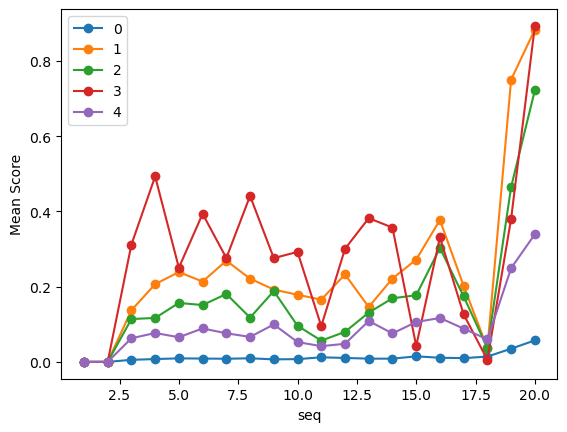

In [279]:
import matplotlib.pyplot as plt

mean_scores_df = data_with_clusters.groupby(['cluster_dep', 'seq'])['risk_score'].mean().reset_index()

for name, group in mean_scores_df.groupby('cluster_dep'):
    plt.plot(group['seq'], group['risk_score'], marker='o', label=name)

plt.xlabel('seq')
plt.ylabel('Mean Score')
plt.legend()

plt.show()


In [280]:
df_st = data_with_clusters.groupby('stay_id').first()
result_counts = pd.DataFrame()

for i in range(5):
    counts = df_st[df_st['cluster_dep'] == i]['result'].value_counts().reset_index()

    counts.columns = ['Result', f'Cluster_{i}_Count']

    if result_counts.empty:
        result_counts = counts
    else:
        result_counts = pd.merge(result_counts, counts, on='Result', how='outer')

result_counts = result_counts.fillna(0)

result_counts

,Result,Cluster_0_Count,Cluster_1_Count,Cluster_2_Count,Cluster_3_Count,Cluster_4_Count
0,ed,76912,270,572,53,3715
1,hos,57032,6038,6953,1106,17503
2,icu,1373,2379,1033,2585,1815


In [296]:
pivot_data_1.drop(columns=['cluster_5'], inplace=True)
pivot_data_1

seq,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
stay_id,,,,,,,,,,,,,,,,,,,,
30000012.0,2.612434e-07,2.777554e-04,3.372994e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000039.0,1.662692e-06,7.560774e-08,2.643095e-06,2.287070e-04,0.011209,0.220935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000094.0,1.373841e-05,2.342376e-07,3.728680e-06,1.156839e-04,0.005338,0.107315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000202.0,7.786828e-06,3.899456e-09,2.380937e-08,1.400539e-07,0.000015,0.001552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30000262.0,2.825787e-07,8.626961e-07,1.201551e-05,1.665220e-06,0.000001,0.000004,0.000006,0.000005,0.000458,0.007873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39999813.0,9.067319e-13,2.299572e-05,8.928271e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39999828.0,1.600381e-07,3.082091e-07,2.381064e-06,7.732746e-07,0.000002,0.000002,0.000002,0.000002,0.000004,0.000002,2.372881e-08,1.956112e-09,2.826581e-08,5.333751e-07,0.000071,0.000252,0.003105,0.006376,NaN,NaN
39999835.0,1.846678e-07,4.605566e-11,2.107844e-09,1.712304e-07,0.000084,0.011554,0.513170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
#from tslearn.preprocessing import TimeSeriesScalerMeanVariance
#normalized_data = TimeSeriesScalerMeanVariance().fit_transform(pivot_data_1.values)

n_clusters = 4
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter=4, metric="dtw", verbose=True, random_state=2023,n_jobs=-1 )
cluster_labels = kmeans.fit_predict(pivot_data_1)

pivot_data_1['cluster_4'] = cluster_labels

data_with_clusters_1 = pd.merge(risf_df, pivot_data_1['cluster_4'], left_on='stay_id', right_index=True)

In [34]:
#data_with_clusters.to_csv('result_1.csv')
data_with_clusters_1=pd.read_csv('result_dep.csv',index_col=0)

In [35]:
data_with_clusters_1

,stay_id,risk_score,result,seq,cluster_dep
0,30000012.0,2.612434e-07,hos,1,4
1,30000012.0,2.777554e-04,hos,2,4
2,30000012.0,3.372994e-01,hos,3,4
4,30000039.0,1.662692e-06,hos,1,4
5,30000039.0,7.560774e-08,hos,2,4
...,...,...,...,...,...
1156496,39999961.0,2.455341e-08,hos,2,4
1156497,39999961.0,1.200976e-06,hos,3,4
1156498,39999961.0,1.537639e-04,hos,4,4
1156499,39999961.0,9.854950e-03,hos,5,4


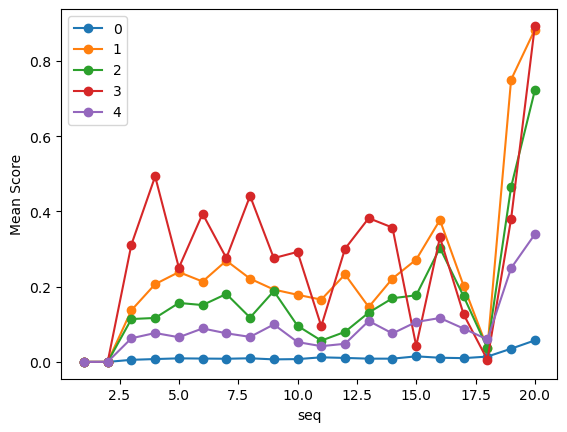

In [36]:
import matplotlib.pyplot as plt

mean_scores_df = data_with_clusters_1.groupby(['cluster_dep', 'seq'])['risk_score'].mean().reset_index()

for name, group in mean_scores_df.groupby('cluster_dep'):
    plt.plot(group['seq'], group['risk_score'], marker='o', label=name)

plt.xlabel('seq')
plt.ylabel('Mean Score')
plt.legend()

plt.show()


In [37]:
df_st = data_with_clusters_1.groupby('stay_id').first()
result_counts = pd.DataFrame()

for i in range(5):
    counts = df_st[df_st['cluster_dep'] == i]['result'].value_counts().reset_index()

    counts.columns = ['Result', f'Cluster_{i}_Count']

    if result_counts.empty:
        result_counts = counts
    else:
        result_counts = pd.merge(result_counts, counts, on='Result', how='outer')

result_counts = result_counts.fillna(0)

result_counts

,Result,Cluster_0_Count,Cluster_1_Count,Cluster_2_Count,Cluster_3_Count,Cluster_4_Count
0,ed,76912,270,572,53,3715
1,hos,57032,6038,6953,1106,17503
2,icu,1373,2379,1033,2585,1815


In [219]:
result_counts.to_csv('result.csv')

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
normalized_data = TimeSeriesScalerMeanVariance().fit_transform(pivot_data_1.values)
distortions = []
K = range(1, 10)  # You can adjust the range of k as needed
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()
